<a href="https://colab.research.google.com/github/mazdakdev/AI-Bootcamp/blob/main/MLPClassifier_Neural_Netowrk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Creating a DataFrame using pandas from iris dataset

In [ ]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Assign data from first four columns to X variable
X = iris_data.iloc[:, 0:4]

# Assign data from first fifth columns to y variable
y = iris_data.target

X.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Feature Scaling
transform the features of a dataset to have a mean of 0 and standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train the Neural Network 

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

### Visualizing the Neural Network

In [ ]:
import joblib
from graphviz import Digraph

# Save the model to a file
joblib.dump(mlp, 'model.joblib')

# Load the model from the file
model = joblib.load('model.joblib')

In [ ]:
# Convert the model into a graph using graphviz

dot_data = Digraph()
dot_data.node("input", label="Input")

for i in range(len(model.coefs_)):
    layer_name = f'layer{i+1}'
    dot_data.node(layer_name, label=f"Layer {i+1}")
    for j in range(model.coefs_[i].shape[1]):
        node_name = f'{layer_name}_node{j}'
        dot_data.node(node_name, label='')
        dot_data.edge(f'{layer_name}', node_name)
        dot_data.edge('input' if i==0 else f'layer{i}_node{j}', node_name)
dot_data.node('output', label='Output')

for i in range(model.coefs_[-1].shape[1]):
    dot_data.edge(f'layer{len(model.coefs_)}_node{i}', 'output')


# Render the graph using graphviz
dot_data.render('model', view=True)



'model.pdf'

### Installing Requirements

#### macOS

```console
user@host:~/ $ brew install poppler
```

#### Windows

Windows users will have to build or download poppler for Windows. based on the library documentation it's recommend to use [@oschwartz10612](https://github.com/oschwartz10612/poppler-windows/releases/) version which is the most up-to-date. You will then have to add the ```bin/``` folder to [PATH](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/) or use ```poppler_path = r"C:\path\to\poppler-xx\bin" ```as an argument in ```convert_from_path.```


In [ ]:
!pip install pdf2image
!apt-get install poppler-utils 

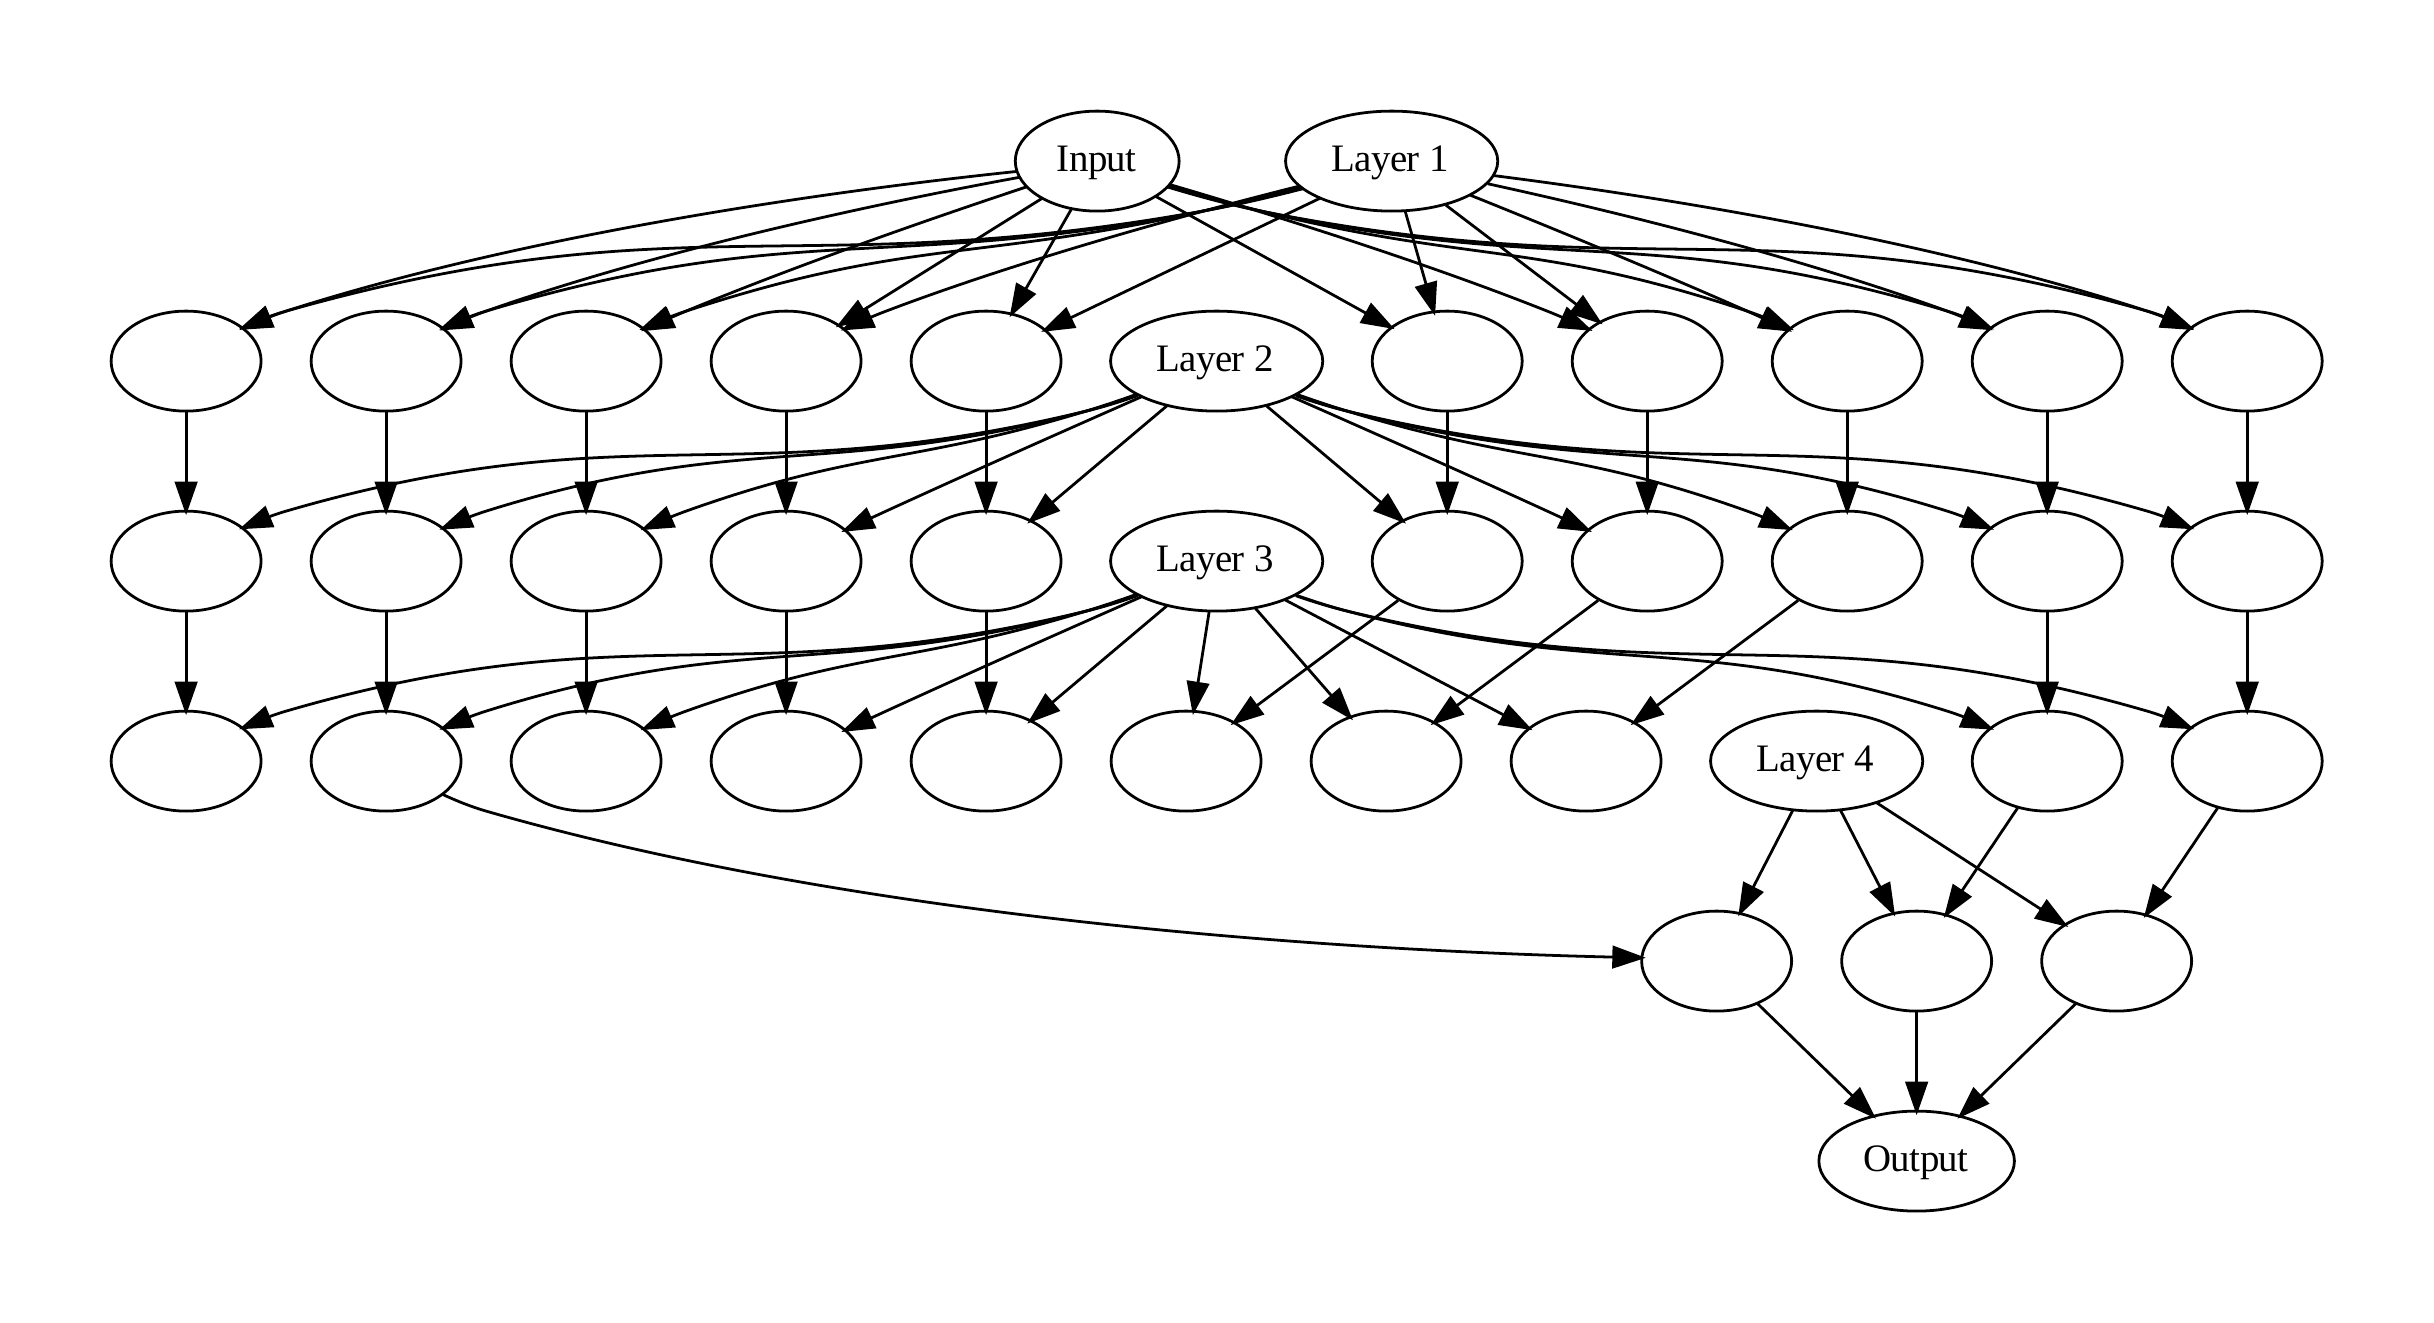

In [25]:
from pdf2image import convert_from_path

images = convert_from_path("model.pdf")
images[0]  # first page


### Evaluating the Algorithm
Using confusion matrix and classificarion report

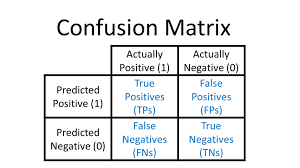

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

